# Проверка гипотезы и составление аналитической записки

## Цели и задачи проекта

**Цель проекта:** статистически доказать выдвинутую нами гипотезу о том, что пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиваением книг в приложении N Книги, чем пользователи из Москвы.

**Задачи проекта:**
- Загрузить данные пользователей из Москвы и Санкт-Петербурга
- Проверить наличие дубликатов в идентификаторах пользователей
- Сравнить размеры двух групп, их статистики и распределение
- Попробовать статистически доказать выдвинутую гипотезу
- По результатам анализа данных подготовить аналитическую записку

## Описание данных

В наших руках датасет `/datasets/knigi_data.csv` с данными пользователей из Москвы и Санкт-Петербурга и их активностью (суммой часов чтения и прослушивания). 

- `city` - название города (Москва или Санкт-Петербург)
- `puid` - идентификатор пользователя
- `hours` - сумма часов чтения и прослушивания

## Содержимое проекта

Содержание проекта отражает поставленные задачи, продублируем их:
- Загрузить данные пользователей из Москвы и Санкт-Петербурга
- Проверить наличие дубликатов в идентификаторах пользователей
- Сравнить размеры двух групп, их статистики и распределение
- Попробовать статистически доказать выдвинутую гипотезу
- По результатам анализа данных подготовить аналитическую записку

---

## 1. Загрузка данных и знакомство с ними

Загрузим данные пользователей из Москвы и Санкт-Петербурга c их активностью (суммой часов чтения и прослушивания) из файла `/datasets/knigi_data.csv`.

In [ ]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import ttest_ind, mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

In [ ]:
# выгружаем данные
knigi_data = pd.read_csv('path/knigi_data.csv')

knigi_data.head()

,Unnamed: 0,city,puid,hours
0,0,Москва,9668,26.167776
1,1,Москва,16598,82.111217
2,2,Москва,80401,4.656906
3,3,Москва,140205,1.840556
4,4,Москва,248755,151.326434


### 1.1. Проверка наличия дубликатов

In [3]:
print(f"Кол-во дубликатов равно {knigi_data['puid'].duplicated().sum()}")

Кол-во дубликатов равно 244


In [4]:
# удалим дубликаты
knigi_data = knigi_data.drop_duplicates(subset='puid')
print(f"После удаления осталось {knigi_data['puid'].duplicated().sum()} дубликатов")

После удаления осталось 0 дубликатов


### 1.2. Сравнение групп

In [5]:
# разделим пользователей на две группы по городам
moscow_data = knigi_data[knigi_data['city'] == 'Москва']
piter_data = knigi_data[knigi_data['city'] == 'Санкт-Петербург']
shape = round(100 * ((abs(len(moscow_data) - len(piter_data))) / len(moscow_data)), 3)

print(f'\nКол-во пользователей с Москвы: {len(moscow_data)}\nКол-во пользователей с Санкт-Петерберга: {len(piter_data)}\nРазница в группах составляет {round(shape)}%')


Кол-во пользователей с Москвы: 6234
Кол-во пользователей с Санкт-Петерберга: 2306
Разница в группах составляет 63%


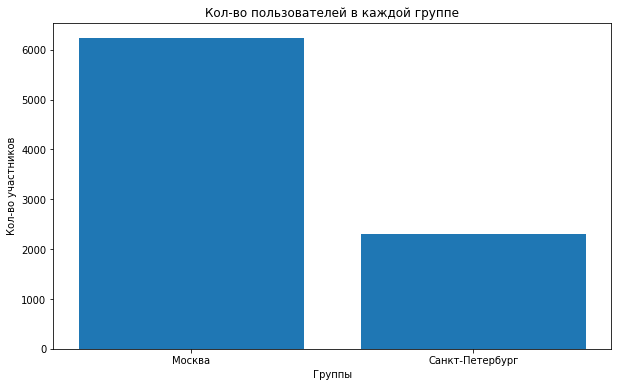

In [6]:
# построим столбчатую диаграмму
plt.figure(figsize=(10, 6))

grouped_data = knigi_data.groupby('city')['puid'].nunique()
plt.bar(grouped_data.index, grouped_data.values)

plt.title('Кол-во пользователей в каждой группе')
plt.xlabel('Группы')
plt.ylabel('Кол-во участников')

plt.show()

Видно, что группа с пользователями из Москвы значительно больше группы с пользователями из Санкт-Петербурга, посмотрим их статистики и распределение:

In [7]:
# проверим совпадения пользователей
merged_group_df = pd.merge(moscow_data, piter_data, how='inner', on=list(moscow_data.columns))

# проверяем наличие совпадающих строк
if merged_group_df.empty:
    print("Пользователей, которые одновременно встречаются в обоих группах, нет")
else:
    print("Есть совпадающие пользователи:", merged_df)

Пользователей, которые одновременно встречаются в обоих группах, нет


In [8]:

grouped_knigi = knigi_data.groupby('city')['hours'].mean()
print(grouped_knigi)

city
Москва             10.881092
Санкт-Петербург    11.264433
Name: hours, dtype: float64


Мы видим, что пользователи из Санкт-Петербурга гораздо больше проводят времени в приложении, чем пользователи с Москвы. Распределение Московских пользователей находится в рамках от нуля до шести с небольшим тысяч, в то время как распределение Санкт-Петербурга от шести с небольшим тысяч. 

In [9]:
print('Рассмотрим статистики пользователей с Москвы:')
print(moscow_data['hours'].describe())

print('\nРассмотрим статистики пользователей с Санкт-Петербурга:')
print(piter_data['hours'].describe())

Рассмотрим статистики пользователей с Москвы:
count    6234.000000
mean       10.881092
std        36.851683
min         0.000018
25%         0.059903
50%         0.924498
75%         5.939972
max       857.209373
Name: hours, dtype: float64

Рассмотрим статистики пользователей с Санкт-Петербурга:
count    2306.000000
mean       11.264433
std        39.831755
min         0.000025
25%         0.060173
50%         0.875355
75%         6.138424
max       978.764775
Name: hours, dtype: float64


- Кол-во пользователей с Москвы, как мы выяснили уже ранее, 6 234 пользователя, кол-во пользователей с Санкт-Петербурга 2 306 пользователей
- Среднее количество часов у пользователей из Санкт-Петербурга слегка выше, чем у москвичей. Разница небольшая, но потенциально значимая
- Показатель стандартного отклонения выше у жителей Санкт-Петербурга, что говорит о большем разбросе данных в этой выборке
- Минимальное значение у обоих городов близко к нулю
- Медианное значение продолжительности использования приложения у большинства пользователей в Москве немного выше, чем в Санкт-Петербурге.
- Максимальное количество часов, проведённых пользователями, выше у Санкт-Петербурга, что связано с наличием отдельных крайне активных пользователей.

**Вывод:** две выборки очень разные по своим данным, первая группа (Москва) на 63% больше второй группы, распределение по количеству часов тоже различается в группах.

## 2. Проверка гипотезы в Python

Гипотеза звучит так: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуем статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

- Нулевая гипотеза H₀: Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается.

- Альтернативная гипотеза H₁: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

Проведем  тест Манни-Уитни, так как у нас есть выбросы и распределения достаточно сильно сдвинуты.

In [12]:
# проведем тест Манна-Уитни для сравнения распределения часов 

alpha = 0.05 # уровень значимости

stat_mw, p_value_mw = mannwhitneyu(
    piter_data['hours'], 
    moscow_data['hours'], 
    alternative='greater'
) 

print(f'Значение p_value равно={p_value_mw}')
if p_value_mw > alpha:
    print('Нулевая гипотеза находит подтверждение')
else:
    print('Нулевая гипотеза не находит подтверждения')

Значение p_value равно=0.6189600878052618
Нулевая гипотеза находит подтверждение


**Вывод:** проведенный статистический тест показан, что альтернативная гипотеза не нашла подтверждения, отсюда следует, что нельзя утверждать, что средняя активность пользователей из Санкт-Петербурга выше, чем у пользователей Москвы 

## 3. Аналитическая записка

По результатам анализа зафиксируем выводы. Был проведенен статистический тест: тест Манна-Уитни для анализа распределения.

- Уровень статистической значимости составляет 0.05
- p_value составило 0.6189600878052618
- Тест показал, что у нас нет оснований отвергать нулевую гипотезу о том, что средняя активность пользователей из Санкт-Петербурга выше, чем у пользователей из Москвы. 
- На самом деле вывод, возможно, сделан ошибочно, так как в группе пользователей Санкт-Петербурга на 63% меньше данных, чем группы пользователей из Москвы. Отсюда можно сделать вывод, что необходимо собрать группы одинакового размера и повторно провести анализ для более точных результатов. 